# Jonathan Halverson
# Tuesday, August 16, 2017
# Chapter 1 of Geron

In 2006, Geoffrey Hinton et al. showed how to train a deep neural network to recognize hand written digits with top accuracy. This was the beginning of deep learning. TensorFlow is a library for training deep NN on distributed systems (GPU). Deep learning can beat other conventional models by a substantial amount for many important problems.

The first mainstream ML application was the spam filter. OCR before that. Arther Samuel gave a definition of machine learning in 1959.

Rules-based approaches are hard to maintain and probably won't handle all possible cases well. Once a ML model has been trained and proven, one can inspect the inner working and learn about how it works. For instance, a spam filter can be examined to see what is considered spam words versus ham words.

Two unsupervised NN architectures are restricted Boltzmann machines and autoencoders.

Francis Galton introduced the term regression to the mean, referring to tall parents having shorter children. The term then stuck for predicting a continuous variable. The Wisdom of Crowds mentions an observation of his from a fair in around 1901.

Keep in mind the clustering methods are still learning methods (there are just no labels). Visualization algorithms are an example of unsupervised learning because they learn groups and plot them close together, for instance. Association rule learning is part of UL. The idea in that case is to work out relationships such as people who buy a lot of honey and nuts tend to buy hand sanitizer.

Semisupervised learning is a mixture of the two. It's like finding people in a set of photos (it finds the individuals and you name them). Deep belief networks are RBMs stacked on top of one another.

Instance-based vs model-based learning: Logistic regression would be model whereas KNN would be instance based, for example.

In [1]:
import numpy as np

In [2]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  For detailed documentation, see `r_`.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from AxisConcatenator:
 |  
 |  __getitem__(self, key)
 |  
 |  __getslice__(self, i, j)
 |  
 |  __le

In [3]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [4]:
np.c_[np.array([[1,2,3]]), np.array([[4,5,6]])]

array([[1, 2, 3, 4, 5, 6]])

In [5]:
np.array([[1,2,3]]) + np.array([[4,5,6]])

array([[5, 7, 9]])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

import pandas as pd
import sklearn
from sklearn import linear_model

In [7]:
gdp = pd.read_csv('geron_life_sat/gdp_per_capita.csv', sep='\t', thousands=',', na_values='n/a', encoding='latin1')
gdp

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
5,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
6,Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
7,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
8,Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
9,Azerbaijan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5739.433,2014.0


In [8]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [9]:
lifsat = pd.read_csv('geron_life_sat/oecd_bli_2015.csv', header=0)
lifsat

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
5,DNK,Denmark,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
6,FIN,Finland,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.60,NaN,NaN
7,FRA,France,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.50,NaN,NaN
8,DEU,Germany,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.10,NaN,NaN
9,GRC,Greece,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.70,NaN,NaN


In [10]:
lifsat.Indicator.value_counts().sort_index()

Air pollution                                109
Assault rate                                 111
Consultation on rule-making                  109
Dwellings without basic facilities           109
Educational attainment                       111
Employees working very long hours            111
Employment rate                              185
Homicide rate                                111
Household net adjusted disposable income     183
Household net financial wealth               109
Housing expenditure                          109
Job security                                 111
Life expectancy                              111
Life satisfaction                            179
Long-term unemployment rate                  185
Personal earnings                            185
Quality of support network                   167
Rooms per person                             109
Self-reported health                         185
Student skills                               185
Time devoted to leis

In [11]:
ls = lifsat[lifsat.Indicator == 'Life satisfaction']
ls

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2670,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2671,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2672,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2673,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
2674,DNK,Denmark,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.5,NaN,NaN
2675,FIN,Finland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.4,NaN,NaN
2676,FRA,France,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
2677,DEU,Germany,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.0,NaN,NaN
2678,GRC,Greece,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,4.8,NaN,NaN


In [12]:
cmb = pd.merge(gdp, ls, how='inner', on='Country')
cmb[['Country', 'Value', '2015']]

,Country,Value,2015
0,Australia,7.3,50961.865
1,Australia,7.2,50961.865
2,Australia,7.4,50961.865
3,Australia,7.4,50961.865
4,Australia,7.2,50961.865
5,Austria,6.9,43724.031
6,Austria,6.9,43724.031
7,Austria,7.0,43724.031
8,Austria,7.6,43724.031
9,Austria,6.9,43724.031


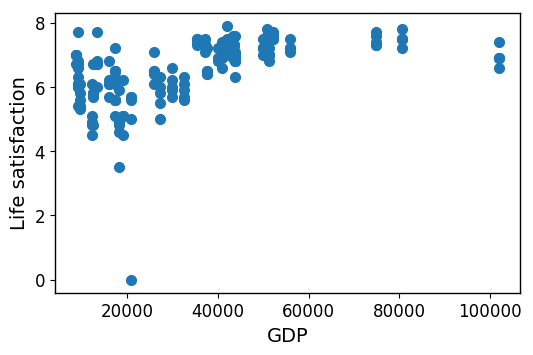

In [13]:
plt.scatter(cmb['2015'], cmb.Value)
plt.xlabel('GDP')
plt.ylabel('Life satisfaction')

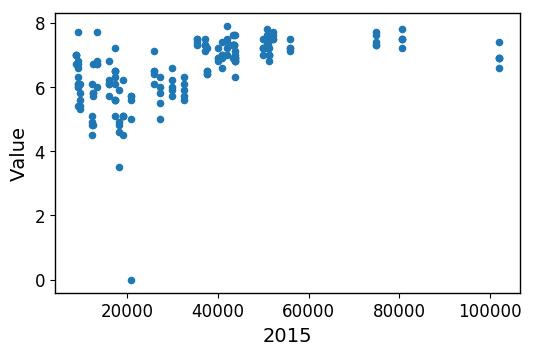

In [23]:
cmb.plot(kind='scatter', x='2015', y='Value')

In [28]:
model = sklearn.linear_model.LinearRegression()
model.fit(cmb['2015'].values.reshape(-1, 1), cmb.Value)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
model.predict([[55000.0]])

array([ 7.0378711])

In [32]:
model.coef_, model.intercept_

(array([  2.44802545e-05]), 5.6914570997516831)

In [24]:
from sklearn import neighbors

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(cmb['2015'].values.reshape(-1, 1), cmb.Value)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [25]:
model.predict([[55000.0]])

array([ 7.16666667])

Geron lists the main challenges of machine learning as insufficient quantity of training data, nonrepresentative training data, poor-quality data, irrelevant features, over- and under-fitting the training data. Just by adding data the same model can perform much better (e.g., grammar checker).